# Cargar archivos fuente

In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme(style='whitegrid', palette='viridis')
plt.rcParams['figure.figsize'] = (12, 6)

ARTIFACTS_DIR = Path('artifacts')
ARTIFACTS_DIR.mkdir(exist_ok=True)

print('Entorno preparado. Directorio artifacts listo.')

Entorno preparado. Directorio artifacts listo.


In [2]:
MOVIES_PATH = Path('data/tmdb_5000_movies.csv')
CREDITS_PATH = Path('data/tmdb_5000_credits.csv')

movies_raw = pd.read_csv(MOVIES_PATH)
credits_raw = pd.read_csv(CREDITS_PATH)

print(f'Movies shape: {movies_raw.shape}')
print(f'Credits shape: {credits_raw.shape}')


Movies shape: (4803, 20)
Credits shape: (4803, 4)


In [3]:
movies_raw.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
movies_raw.describe(include=[np.number])


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Conclusiones rápidas

Dataset con ~5000 películas y columnas financieras, temporales y categóricas (JSON).

budget y revenue presentan ceros/nulos que debemos depurar para ROI.

release_date requiere conversión a fechas para análisis temporales.

# Limpieza y preparación

In [6]:
movies = movies_raw.copy()

nulls = movies.isna().sum().sort_values(ascending=False)
nulls[nulls > 0]


homepage        3091
tagline          844
overview           3
runtime            2
release_date       1
dtype: int64

In [7]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year
movies['release_decade'] = (movies['release_year'] // 10) * 10

movies[['release_date', 'release_year', 'release_decade']].head()


,release_date,release_year,release_decade
0,2009-12-10,2009.0,2000.0
1,2007-05-19,2007.0,2000.0
2,2015-10-26,2015.0,2010.0
3,2012-07-16,2012.0,2010.0
4,2012-03-07,2012.0,2010.0


In [8]:
valid_movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)].copy()
valid_movies['roi'] = valid_movies['revenue'] / valid_movies['budget']

print(f'Películas originales: {len(movies)}')
print(f'Películas con datos válidos para ROI: {len(valid_movies)}')
valid_movies[['title', 'budget', 'revenue', 'roi']].head()


Películas originales: 4803
Películas con datos válidos para ROI: 3229


,title,budget,revenue,roi
0,Avatar,237000000,2787965087,11.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333
2,Spectre,245000000,880674609,3.594590
3,The Dark Knight Rises,250000000,1084939099,4.339756
4,John Carter,260000000,284139100,1.092843


Notas de limpieza

Se descartaron registros sin datos financieros fiables.

Se generaron columnas temporales (release_year, release_decade).

Se calculó ROI listo para análisis posteriores.

# Análisis exploratorio (EDA)

## Distribución del ROI

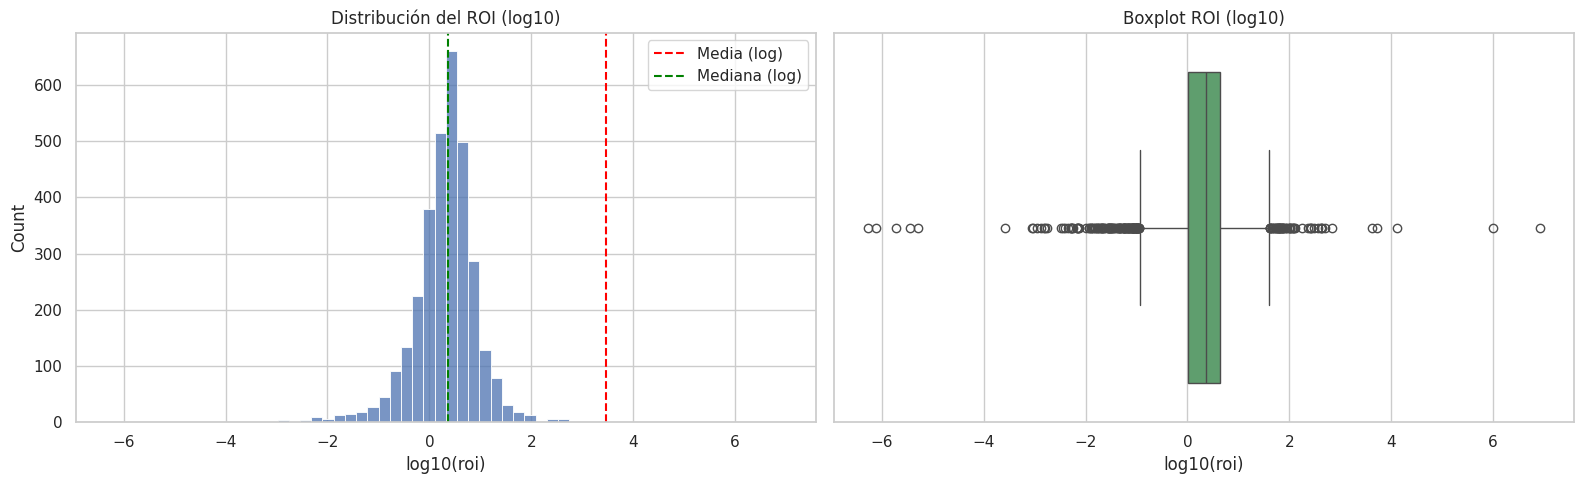

In [9]:
roi = valid_movies['roi'].dropna()

# Evito ROI <= 0 porque log no lo permite
roi = roi[roi > 0]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# --- HISTOGRAMA LOG ---
sns.histplot(np.log10(roi), bins=60, ax=axes[0], color='#4c72b0', edgecolor='white')
axes[0].set_title('Distribución del ROI (log10)')
axes[0].set_xlabel('log10(roi)')
axes[0].set_ylabel('Count')

# Líneas de media y mediana en log
axes[0].axvline(np.log10(roi.mean()), color='red', linestyle='--', label='Media (log)')
axes[0].axvline(np.log10(roi.median()), color='green', linestyle='--', label='Mediana (log)')
axes[0].legend()

# --- BOXPLOT LOG ---
sns.boxplot(x=np.log10(roi), ax=axes[1], color='#55a868')
axes[1].set_title('Boxplot ROI (log10)')
axes[1].set_xlabel('log10(roi)')

plt.tight_layout()
plt.show()


In [10]:
print('TOP 10 ROI positivos:')
display(valid_movies.nlargest(10, 'roi')[['title', 'budget', 'revenue', 'roi']])

print('TOP 10 ROI negativos:')
display(valid_movies.nsmallest(10, 'roi')[['title', 'budget', 'revenue', 'roi']])


TOP 10 ROI positivos:


,title,budget,revenue,roi
4238,Modern Times,1,8500000,8.500000e+06
3137,Nurse 3-D,10,10000000,1.000000e+06
4577,Paranormal Activity,15000,193355800,1.289039e+04
4582,Tarnation,218,1162014,5.330339e+03
4496,The Blair Witch Project,60000,248000000,4.133333e+03
4724,Eraserhead,10000,7000000,7.000000e+02
4788,Pink Flamingos,12000,6000000,5.000000e+02
4742,Super Size Me,65000,28575078,4.396166e+02
4723,The Gallows,100000,42664410,4.266441e+02
4514,Open Water,130000,54667954,4.205227e+02


TOP 10 ROI negativos:


,title,budget,revenue,roi
1655,Chasing Liberty,23000000,12,5.217391e-07
2485,The Cookout,16000000,12,7.500000e-07
2874,In the Cut,12000000,23,1.916667e-06
3875,Dreaming of Joseph Lees,2000000,7,3.500000e-06
2068,Death at a Funeral,9000000,46,5.111111e-06
1999,The Adventurer: The Curse of the Midas Box,25000000,6399,2.559600e-04
2901,5 Days of War,20000000,17479,8.739500e-04
3121,Janky Promoters,10000000,9069,9.069000e-04
1101,Foodfight!,65000000,73706,1.133938e-03
2651,The Good Night,15000000,20380,1.358667e-03


In [11]:
def parse_json_list(value):
    try:
        return [item['name'] for item in json.loads(value)]
    except (TypeError, json.JSONDecodeError):
        return []


valid_movies['genres_list'] = valid_movies['genres'].apply(parse_json_list)

movies_by_genre = (
    valid_movies.explode('genres_list')
    .dropna(subset=['genres_list'])
    .rename(columns={'genres_list': 'genre'})
)

genre_roi = (
    movies_by_genre.groupby('genre')['roi']
    .agg(['mean', 'median', 'count'])
    .rename(columns={'mean': 'roi_mean', 'median': 'roi_median', 'count': 'movies'})
    .sort_values('roi_mean', ascending=False)
)

genre_roi.head(10)


,roi_mean,roi_median,movies
genre,,,
Comedy,7663.066247,2.303358,1110
Drama,5908.024215,2.059136,1441
Horror,3077.422678,2.886369,332
Thriller,1074.897187,2.170408,935
Documentary,160.106742,3.316722,38
Mystery,67.761837,2.130232,265
Music,6.435301,3.123046,111
Animation,6.087650,2.787321,188
Science Fiction,5.926710,2.226816,431


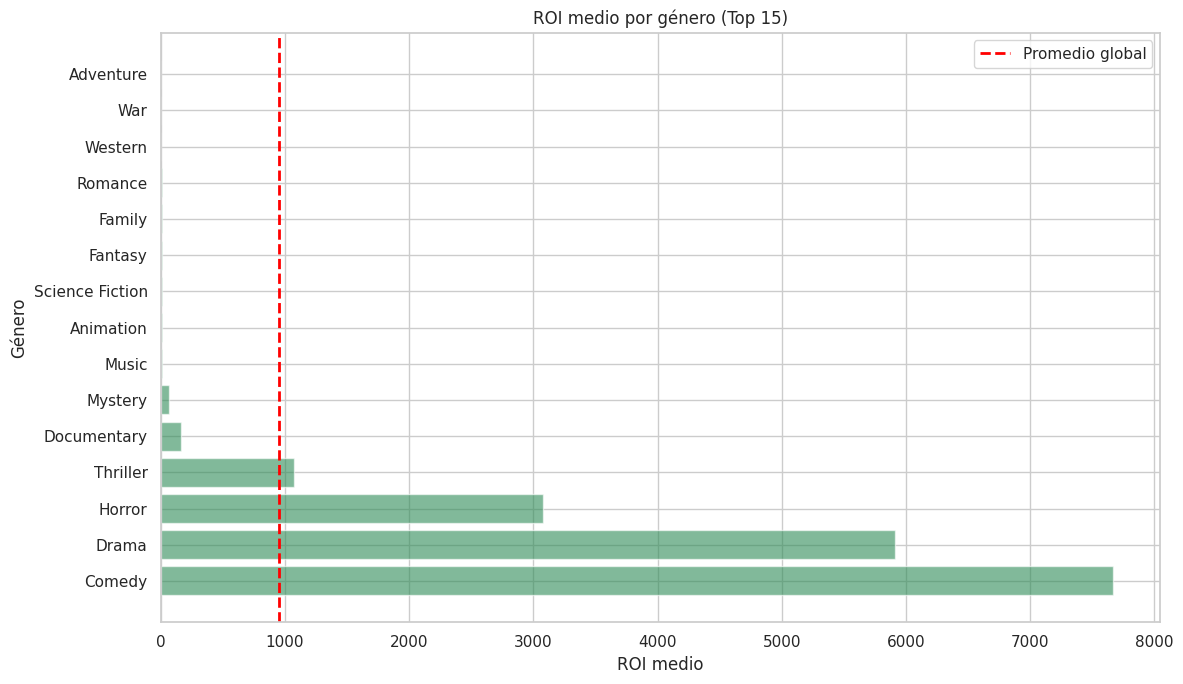

In [12]:
top_genres = (
    genre_roi
    .head(15)
    .reset_index()
    .rename(columns={'index': 'genre'})
)

plt.figure(figsize=(12, 7))

plt.barh(top_genres['genre'], top_genres['roi_mean'], color='seagreen', alpha=0.6)

plt.axvline(
    genre_roi['roi_mean'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label='Promedio global'
)

plt.xlabel("ROI medio")
plt.ylabel("Género")
plt.title("ROI medio por género (Top 15)")
plt.legend()

plt.tight_layout()
plt.show()


Hallazgos clave

La distribución del ROI es fuertemente sesgada: pocas películas logran multiplicar su inversión.

Géneros como Horror/Thriller destacan por ROI elevado gracias a presupuestos controlados.

Estos resultados alimentan el análisis de rentabilidad para la API (por género/país).

## Evolución de la duración de películas (últimos 50 años)

,movies,runtime_mean,runtime_median
decade,,,
1960.0,20,125.800000,119.5
1970.0,109,116.256881,113.0
1980.0,278,110.643885,106.0
1990.0,778,110.366324,106.0
2000.0,2048,105.438965,102.0
2010.0,1444,104.038089,102.0


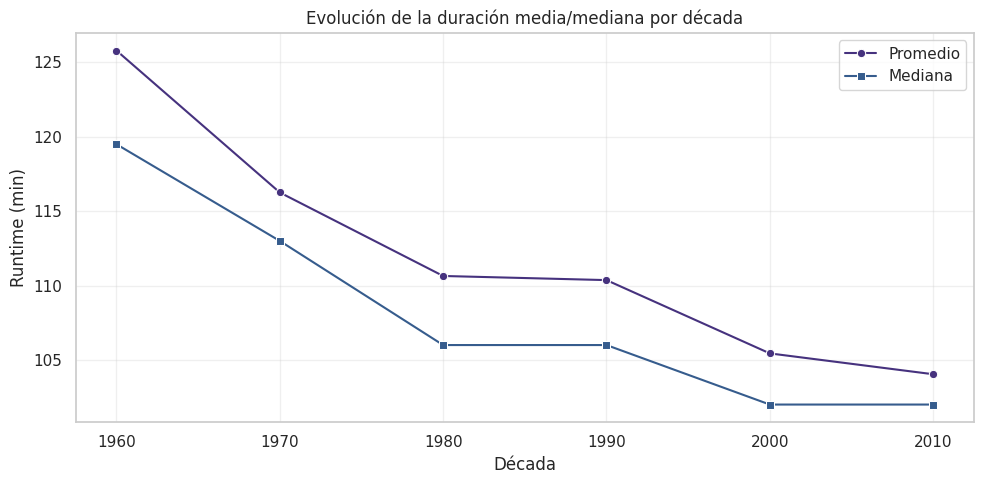

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

recent_year = movies['release_year'].dropna().max()
cutoff_year = recent_year - 49
recent_movies = (
    movies
    .loc[movies['release_year'].between(cutoff_year, recent_year)]
    .dropna(subset=['runtime'])
    .copy()
)

recent_movies['decade'] = (recent_movies['release_year'] // 10) * 10

runtime_by_decade = (
    recent_movies
    .groupby('decade')['runtime']
    .agg(['count', 'mean', 'median'])
    .rename(columns={'count': 'movies', 'mean': 'runtime_mean', 'median': 'runtime_median'})
    .sort_index()
)

display(runtime_by_decade)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=runtime_by_decade.reset_index(),
    x='decade',
    y='runtime_mean',
    marker='o',
    label='Promedio',
    ax=ax
)
sns.lineplot(
    data=runtime_by_decade.reset_index(),
    x='decade',
    y='runtime_median',
    marker='s',
    label='Mediana',
    ax=ax
)
ax.set_title('Evolución de la duración media/mediana por década')
ax.set_xlabel('Década')
ax.set_ylabel('Runtime (min)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

## Actores que aparecen juntos más frecuentemente.

,actor_a,actor_b,colaboraciones
0,Adam Sandler,Allen Covert,12
1,Desmond Llewelyn,Lois Maxwell,12
2,Adam Sandler,Jackie Sandler,11
3,Ben Stiller,Owen Wilson,11
4,Bernard Lee,Lois Maxwell,11
5,Ricardo Garcia,Ricardo Garcia,10
6,Adam Sandler,Rob Schneider,10
7,Adam Sandler,Sadie Sandler,10
8,Chris Miller,Conrad Vernon,10
9,Bernard Lee,Desmond Llewelyn,9


Nodes: 1726, edges: 5022
Top 50 subgraph - Nodes: 42, Edges: 70


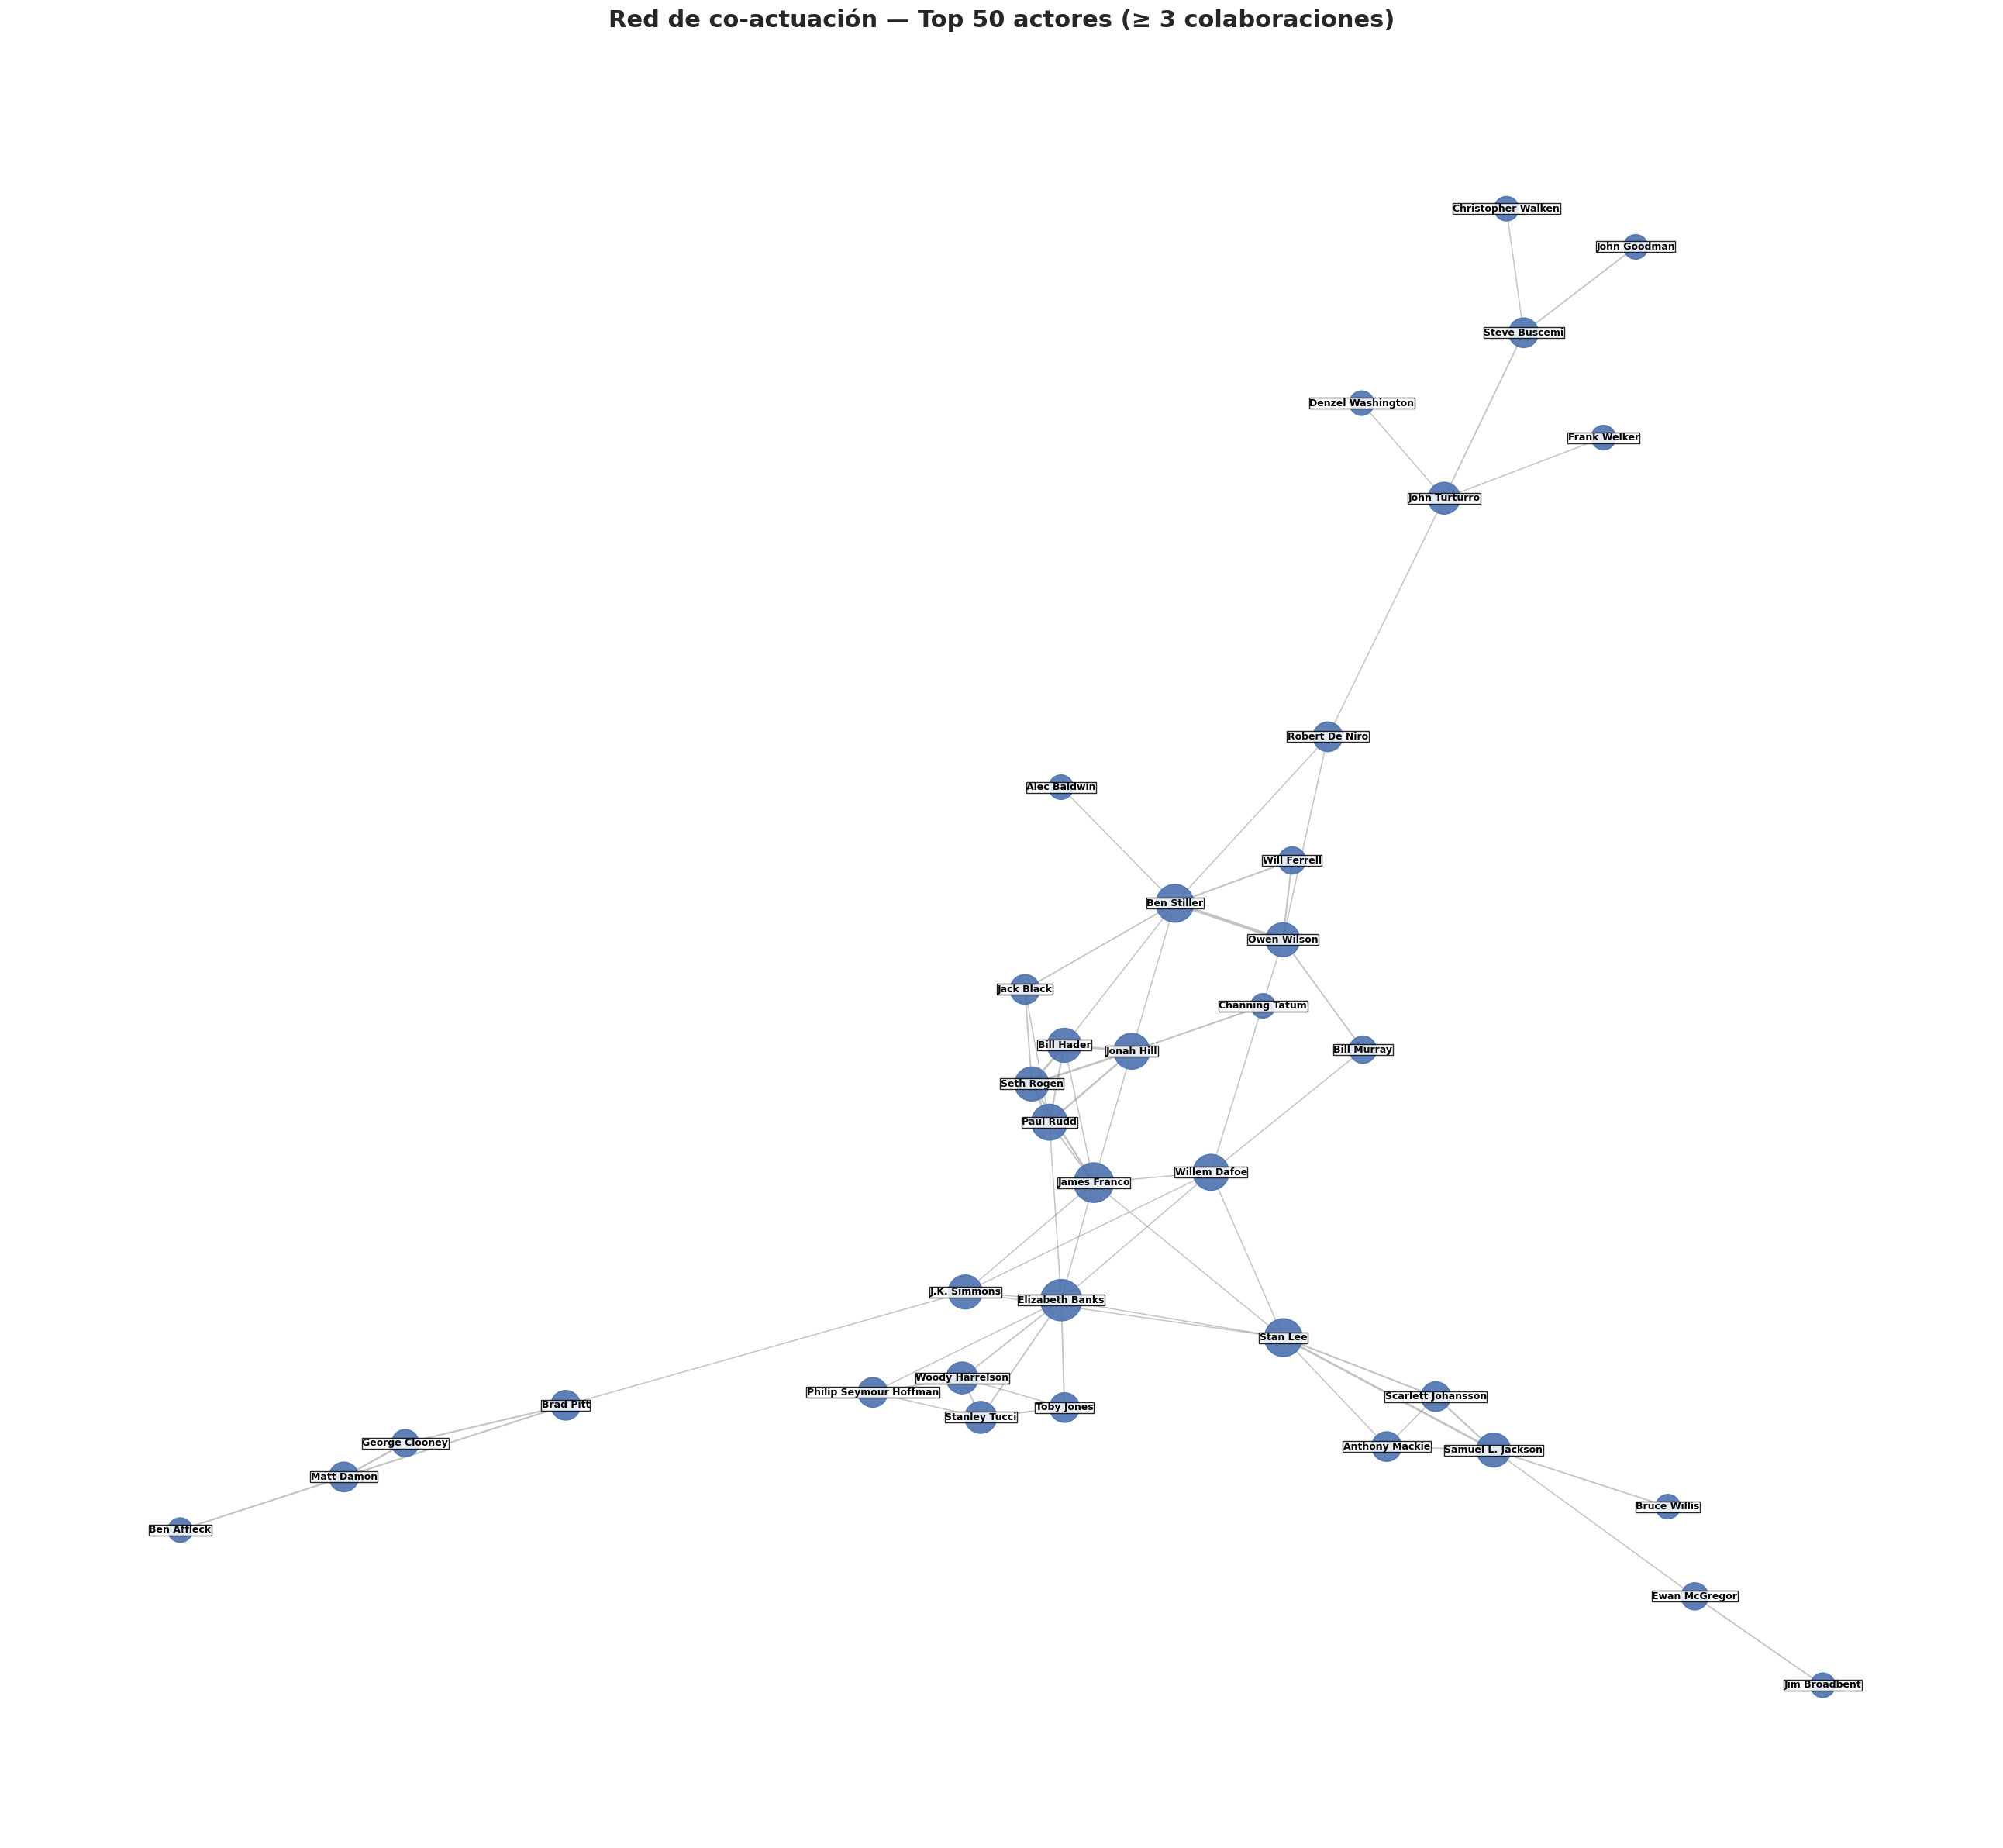

In [14]:
import json
from itertools import combinations
from pathlib import Path
from services.data_loader import credits_data
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# --- Load data ---
ARTIFACTS_DIR = Path('artifacts')

# --- Build actor pairs ---
pairs = []

for credit in credits_data:
    cast = credit.get("cast", [])
    cast = json.loads(cast)
    actors = [actor.get("name") for actor in cast[:50] if actor.get("name")]

    if len(actors) >= 2:
        _pairs = combinations(sorted(actors),2)
        pairs.extend(_pairs)


pairs_df = (
    pd.DataFrame(pairs, columns=['actor_a', 'actor_b'])
    .value_counts()
    .reset_index(name='colaboraciones')
    .sort_values('colaboraciones', ascending=False)
)

display(pairs_df.head(50))

# --- Filter edges with >= 3 co appearances ---
top_edges = pairs_df[pairs_df['colaboraciones'] >= 3]

# --- Build graph ---
G = nx.Graph()
for _, row in top_edges.iterrows():
    G.add_edge(row['actor_a'], row['actor_b'], weight=row['colaboraciones'])

print(f'Nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}')

# =====================================================
# CO-ACTING NETWORK
# =====================================================

# -----------------------------------------------------
# STEP 1: Select Top 50 actors by total collaborations
# -----------------------------------------------------
actor_counts = {}
for _, row in pairs_df.iterrows():
    actor_counts[row['actor_a']] = actor_counts.get(row['actor_a'], 0) + row['colaboraciones']
    actor_counts[row['actor_b']] = actor_counts.get(row['actor_b'], 0) + row['colaboraciones']

top_50_actors = sorted(actor_counts, key=actor_counts.get, reverse=True)[:50]

# -----------------------------------------------------
# STEP 2: Filter meaningful collaborations
# -----------------------------------------------------
filtered_edges = pairs_df[
    (pairs_df['colaboraciones'] >= 3) &
    (pairs_df['actor_a'].isin(top_50_actors)) &
    (pairs_df['actor_b'].isin(top_50_actors))
]

# -----------------------------------------------------
# STEP 3: Build subgraph
# -----------------------------------------------------
G_top = nx.Graph()
for _, row in filtered_edges.iterrows():
    G_top.add_edge(
        row['actor_a'],
        row['actor_b'],
        weight=row['colaboraciones']
    )

print(f'Top 50 subgraph - Nodes: {G_top.number_of_nodes()}, Edges: {G_top.number_of_edges()}')

# -----------------------------------------------------
# STEP 4: Use ONLY the main connected component
# -----------------------------------------------------
largest_cc = max(nx.connected_components(G_top), key=len)
G_top = G_top.subgraph(largest_cc).copy()

# -----------------------------------------------------
# STEP 5: Robust spring layout (NO MANUAL SCALING)
# -----------------------------------------------------
pos = nx.spring_layout(
    G_top,
    seed=42,
    k=0.40,
    iterations=1000,
    weight='weight'
)

# -----------------------------------------------------
# STEP 6: Node and edge scaling
# -----------------------------------------------------
degree_dict = dict(G_top.degree())
node_sizes = [400 + 120 * degree_dict[n] for n in G_top.nodes()]

edge_weights = [G_top[u][v]['weight'] for u, v in G_top.edges()]
max_w = max(edge_weights) if edge_weights else 1
edge_widths = [0.4 + (w / max_w) * 2.5 for w in edge_weights]

# -----------------------------------------------------
# STEP 7: Plot
# -----------------------------------------------------
plt.figure(figsize=(26, 24))

# Draw edges behind nodes
nx.draw_networkx_edges(
    G_top,
    pos,
    width=edge_widths,
    alpha=0.35,
    edge_color='#555555'
)

# Draw nodes
nx.draw_networkx_nodes(
    G_top,
    pos,
    node_size=node_sizes,
    node_color='#4c72b0',
    alpha=0.90
)

# -----------------------------------------------------
# STEP 8: Labels only for important actors
# -----------------------------------------------------
font_size = max(7, 18 - int(len(G_top.nodes()) / 4))

nx.draw_networkx_labels(
    G_top,
    pos,
    labels={n: n for n in G_top.nodes()},
    font_size=font_size,
    font_weight='bold',
    bbox=dict(
        facecolor='white',
        edgecolor='black',
        alpha=0.85,
        pad=0.35
    )
)

# -----------------------------------------------------
# STEP 9: Final formatting
# -----------------------------------------------------
plt.title(
    'Red de co-actuación — Top 50 actores (≥ 3 colaboraciones)',
    fontsize=22,
    pad=25,
    fontweight='bold'
)

plt.axis('off')
plt.tight_layout()
plt.savefig(ARTIFACTS_DIR / 'coacting_network.png', dpi=200)
plt.show()